<a href="https://colab.research.google.com/github/s-arora1987/Best-README-Template/blob/master/Practice_Analyzing_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TextBlob is a Python library used for Natural Language Processing (NLP). It relies on NLTK (Natural
Language Toolkit). When you give it a sentence, it gives back two things: polarity and subjectivity.
The polarity score ranges from -1 to 1. A score of -1 means the words are super negative, like “disgusting”
or “awful.” A score of 1 means the words are super positive, like “excellent” or “best.”
Subjectivity score, on the other hand, goes from 0 to 1. If it’s close to 1, it means the sentence has a lot of
personal opinion instead of just facts

In [ ]:
!pip install textblob

ERROR: Operation cancelled by user


In [ ]:
from textblob import TextBlob


In [ ]:
sentence = "“Student of the Year 2” didn’t do well."
res = TextBlob(sentence)
res.sentiment.polarity, res.sentiment.subjectivity

(0.0, 0.0)

In [ ]:
sentence = "“Student of the Year 2” did very well."
res = TextBlob(sentence)
res.sentiment.polarity, res.sentiment.subjectivity

(0.2, 0.3)

In [ ]:
sentence= "no slow-motion camera"
res = TextBlob(sentence)
res.sentiment.polarity, res.sentiment.subjectivity

(0.0, 0.0)

VADER, like TextBlob, is a
lexicon-based sentiment analyzer with predefined rules for words or lexicons. However, what sets VADER
apart is its ability to not only classify words as positive, negative, or neutral but also evaluate the overall
sentiment of a sentence.
The output from VADER is presented in a Python dictionary format, consisting of four keys: ‘neg’ for
negative, ‘neu’ for neutral, ‘pos’ for positive, and ‘compound’. The compound score is particularly
noteworthy as it represents the overall sentiment of the sentence by normalizing the other three scores
(negative, neutral, and positive) between -1 and +1

In [ ]:
!pip install vaderSentiment

ERROR: Operation cancelled by user


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj= SentimentIntensityAnalyzer()

ModuleNotFoundError: No module named 'vaderSentiment'

In [ ]:
sid_obj.polarity_scores("no slow motion camera")

"The website is user-friendly and easy to navigate." → Positive
"I had issues with the payment system, but customer support was helpful." → Mixed (Negative for payment issues, Positive for customer support)
"Great service, but the response time was too slow." → Mixed (Positive for service, Negative for response time)
"The product quality exceeded my expectations, but the delivery took too long." → Mixed (Positive for product quality, Negative for delivery)
"Customer support was unresponsive and rude." → Negative

In [ ]:
s1="The website is user-friendly and easy to navigate"
s2="I had issues with the payment system, but customer support was helpful."
s3="Great service, but the response time was too slow."
s4="The product quality exceeded my expectations, but the delivery took too long."
s5="Customer support was unresponsive and rude."

print(sid_obj.polarity_scores(s1))
print(sid_obj.polarity_scores(s2))
print(sid_obj.polarity_scores(s3))
print(sid_obj.polarity_scores(s4))
print(sid_obj.polarity_scores(s5))
sid_obj.polarity_scores(s1)['compound']

In [ ]:
import matplotlib.pyplot as plt


array_s = [s1, s2, s3, s4, s5]
sentiments = []
for s in array_s:
    sc = sid_obj.polarity_scores(s)['compound']
    if sc>0.4:
        sentiments.append('ps')
    elif sc<-0.4:
        sentiments.append('ng')
    else:
        sentiments.append('nt')

print(sentiments)
plt.hist(sentiments)
plt.show()

sentiments.append('ng')
plt.hist(sentiments)
plt.show()


Identify common themes or topics in the comments.

    Method: Use topic modeling techniques like Latent Dirichlet Allocation (LDA)
   words in the corpus are the only data that we observe. The latent variables determine the random mixture of topics in the corpus and the distribution of words in the documents. The goal of LDA is to use the observed words to infer the hidden topic structure.


    Example Topics:
        Topic 1: Website Usability (e.g., "user-friendly", "navigate")
        Topic 2: Customer Support (e.g., "support", "helpful", "unresponsive")
        Topic 3: Delivery Issues (e.g., "delivery", "slow", "took too long")
        Topic 4: Product Quality (e.g., "quality", "exceeded expectations")

Insights:


    Top Themes: Determine which themes are most prevalent in the feedback.
        Website Usability and Product Quality are frequently mentioned in a positive context.
        Customer Support and Delivery Issues are commonly associated with mixed or negative sentiments.

In [ ]:
!pip install scikit-learn nltk


Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text, and which may be removed to avoid them being construed as signal for prediction.

In [ ]:
# The output is a plot of topics, each represented as bar plot using top few words based on weights.
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        # https://numpy.org/doc/stable/reference/generated/numpy.argsort.html returns indices sorted by values
        # indices for top n words in topic
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        # weights for top n words
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Sample documents
documents = [
    'The car is driven on the road.',
    'The road is long and winding.',
    'The driver of the car is a man.',
    'The car is fast and reliable.',
    'The man is a good driver.',
    'The road is clear and empty.',
    'The car has a powerful engine.',
    'The driver enjoys driving on the road.'
]

# Text preprocessing
'''
tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.
counting the occurrences of tokens in each document.
CountVectorizer implements both tokenization and occurrence counting
'''
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Number of topics
n_topics = 2

# Apply LDA
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(X)

# Display topics
feature_names = vectorizer.get_feature_names_out() # Each term found by the vectorizer
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(topic.argsort())
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))

Topic #0:
[12  7  1  2  5 11  9 14  8  6  4 10  0  3 13]
road driver car man driving enjoys good winding long powerful
Topic #1:
[ 4  6  8  3 10 14  9 11  5  2 13  1  7 12  0]
car reliable fast clear road driven engine powerful long winding


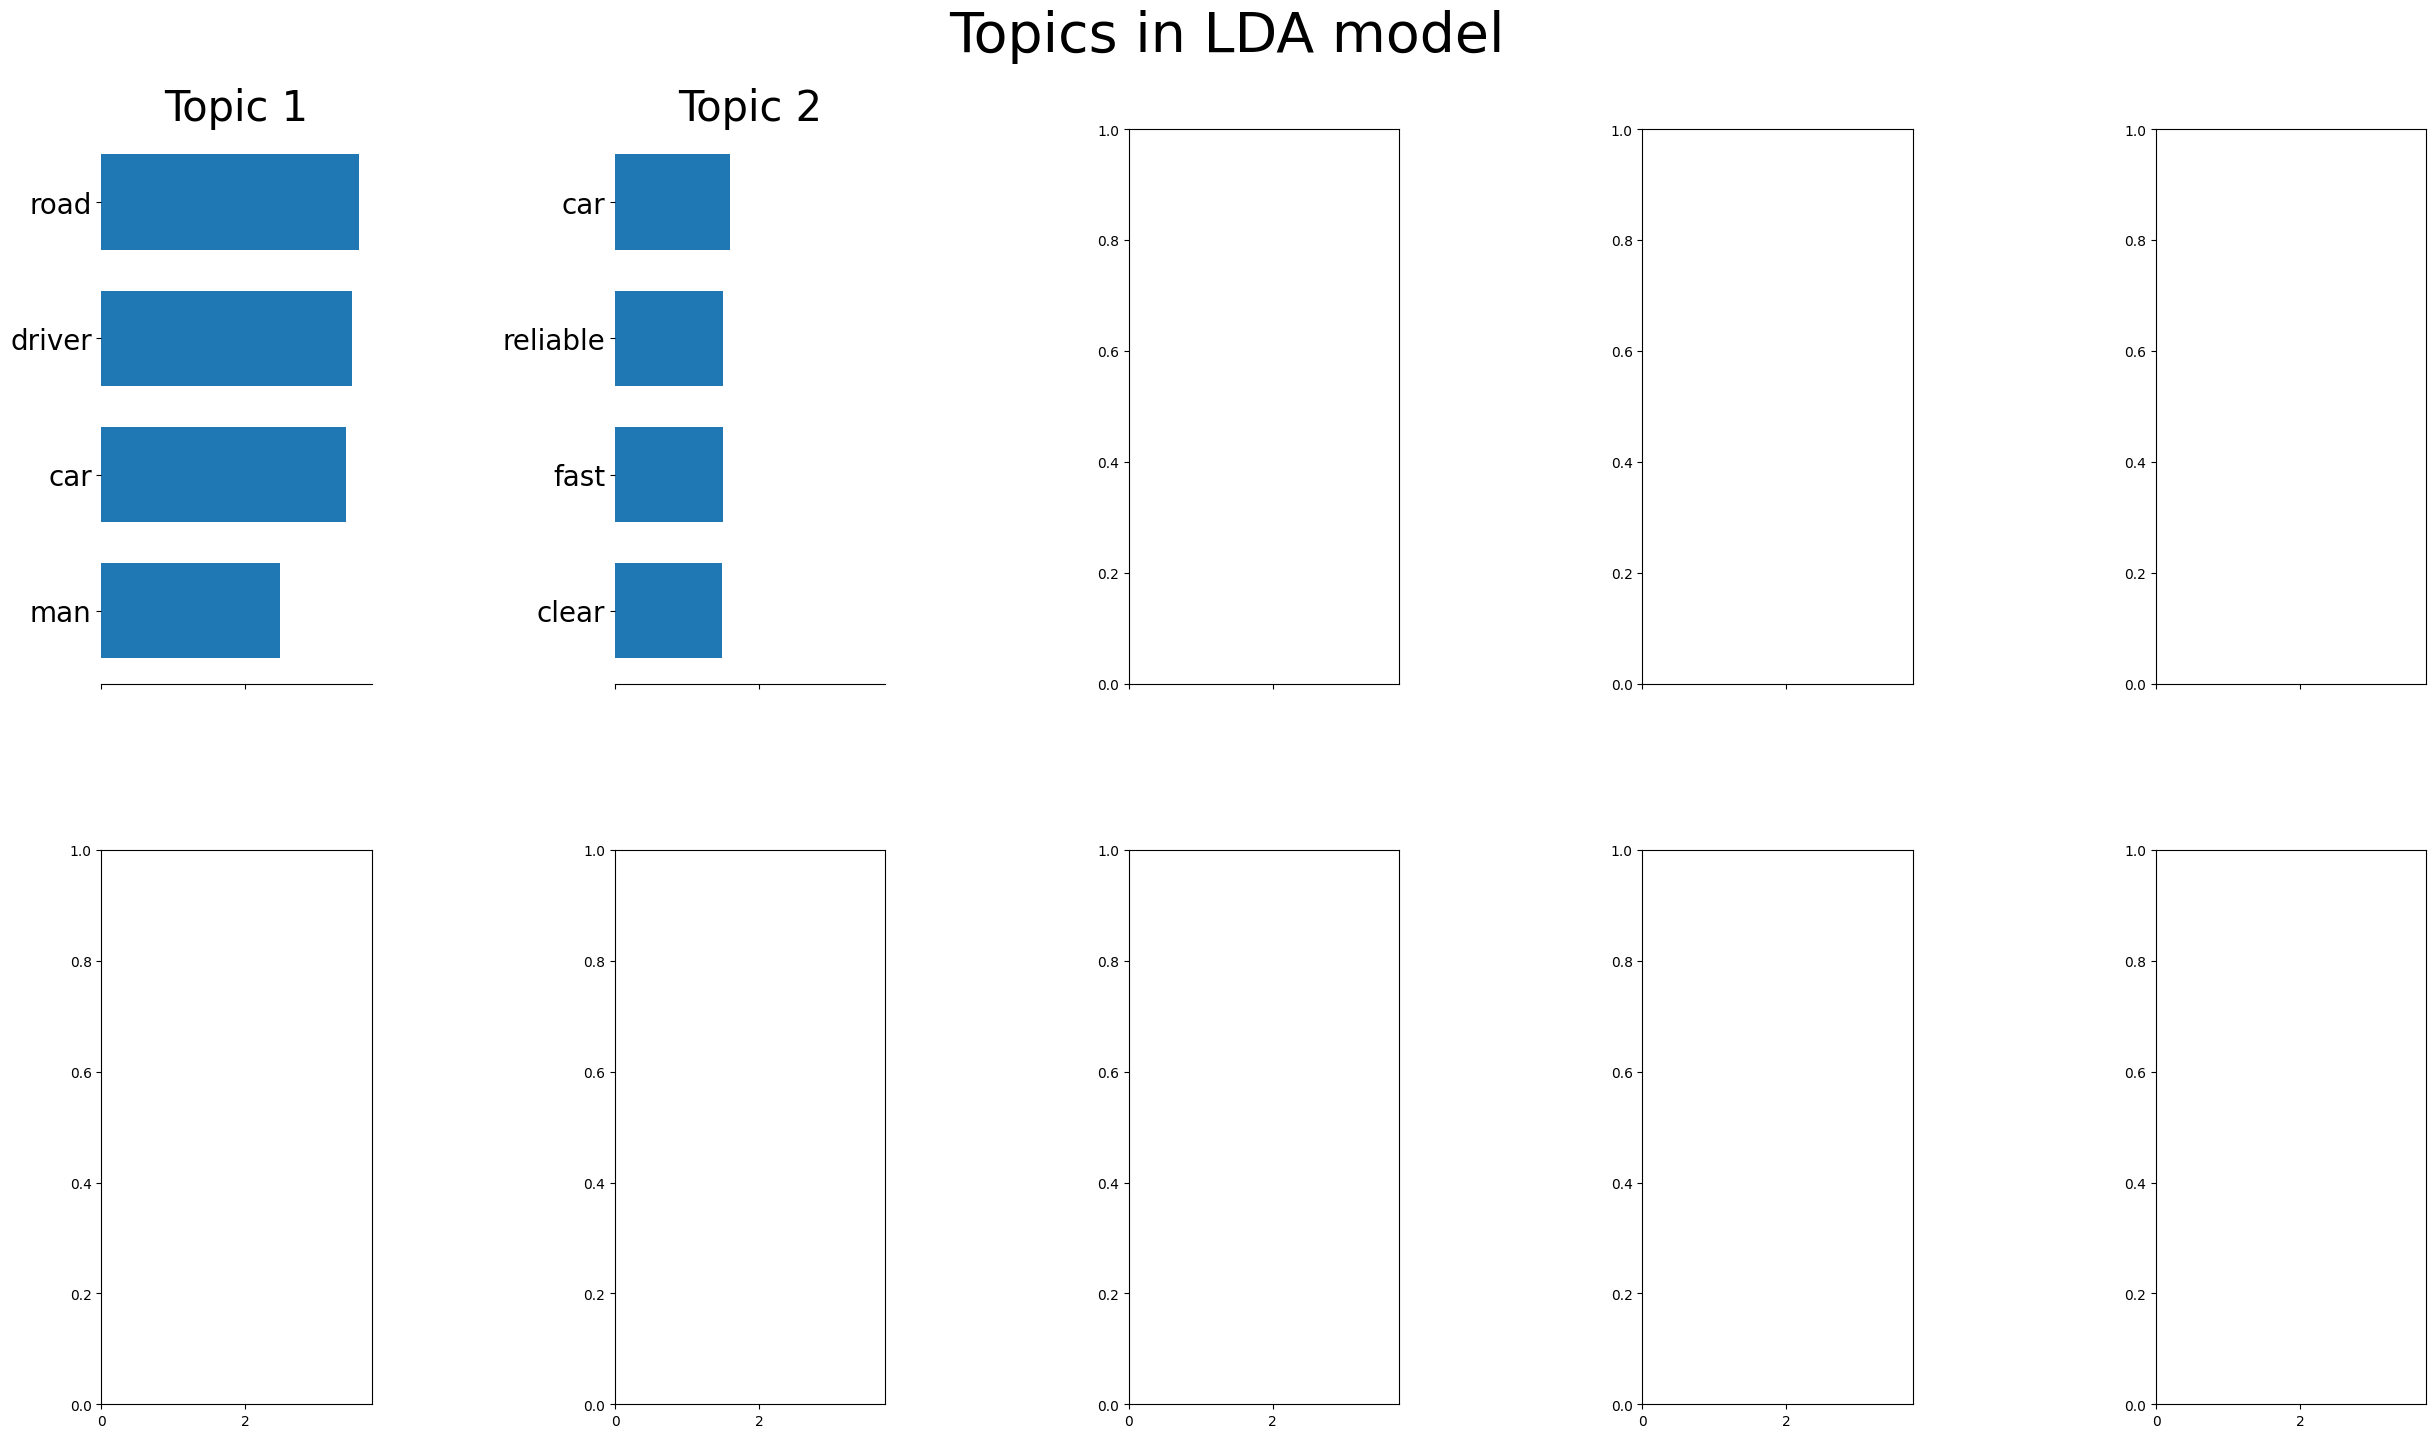

In [ ]:
n_top_words = 4
tf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

     https://scikit-learn.org/stable/modules/decomposition.html#nmf
     method to decompose data signals into components.
     Unlike PCA, the representation of a vector is obtained in an additive fashion, by superimposing the components, without subtracting. Such additive models are efficient for representing images and text.
     
     
     https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

In [ ]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

'''
In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little
meaningful information about the actual contents of the document. If we were to feed the direct count data directly to
a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

TF: term frequency, the number of times a term occurs in a given document,
IDf: ratio of total number of documents in the document set and number of documents in the document set that contain term
result = Tf * IDF
'''
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(documents)

Extracting tf-idf features for NMF...


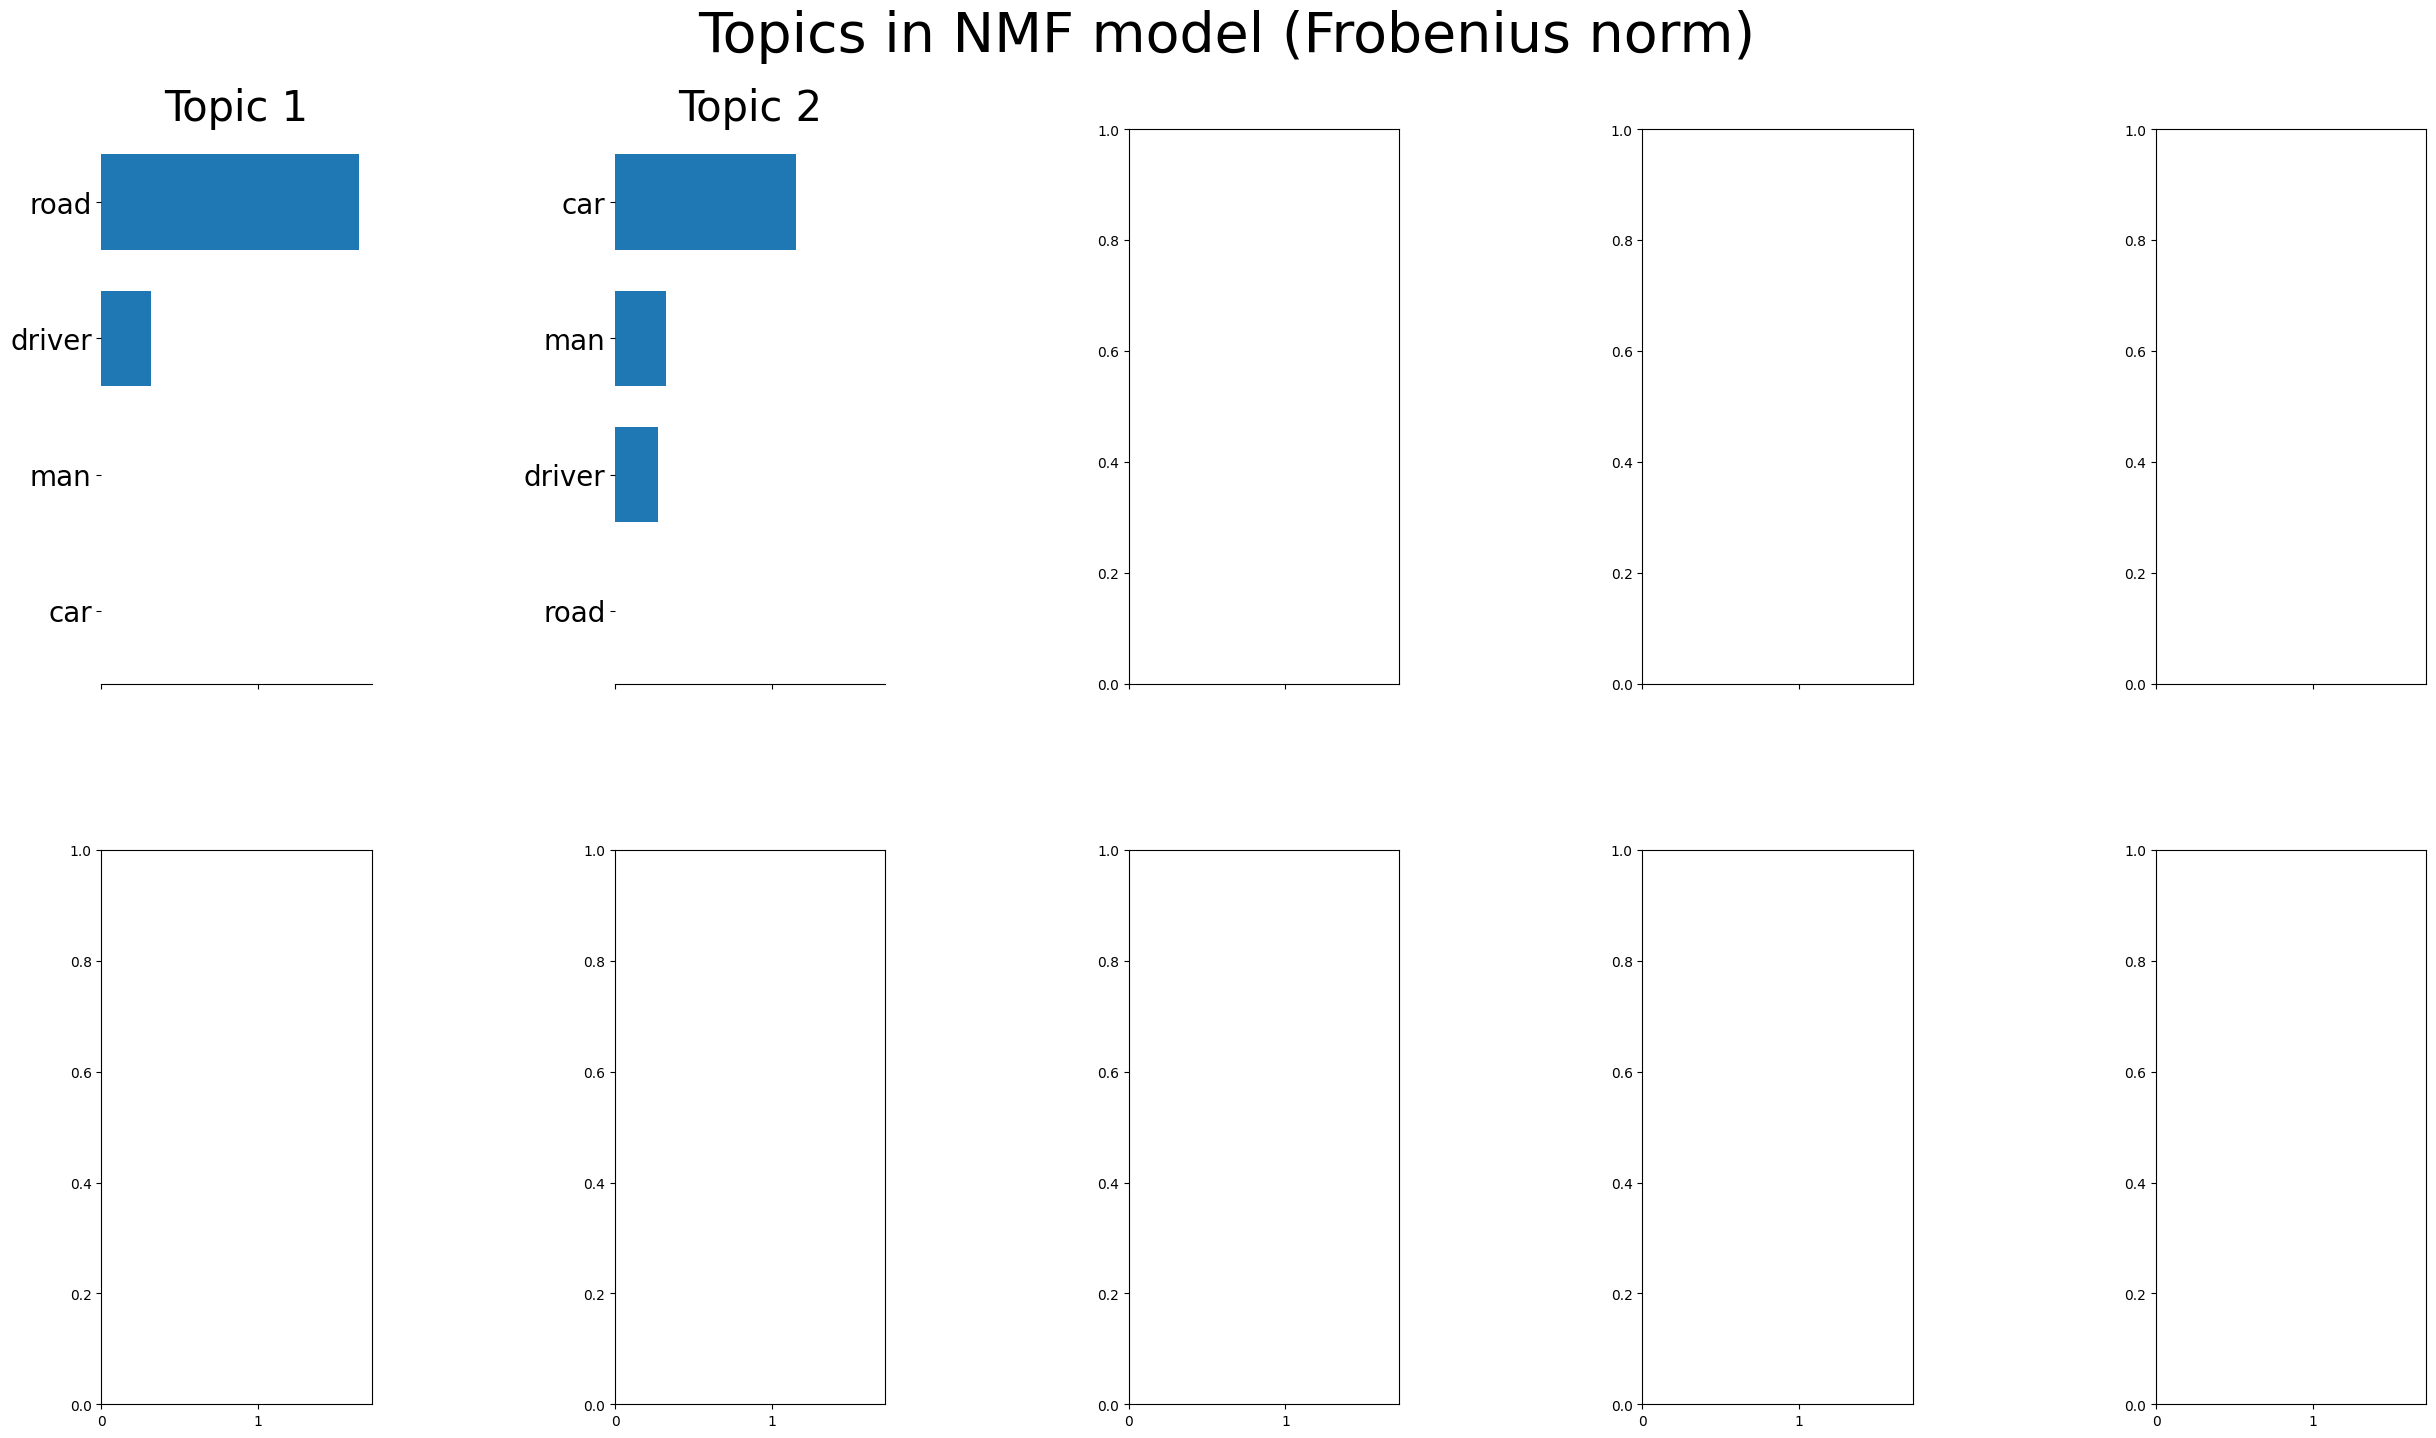

In [ ]:
# Number of topics
n_topics = 2

nmf = NMF(
    n_components=n_topics,
    random_state=0,
    beta_loss="frobenius",
).fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)